DESCRIPTION: Create a set of points and find the best line that fits those points.

# Linear Regression
The goal here is to take a set of (x,y) points and find a line that best fits the points.
"Best" is defined to be the line that minimizes the error function defined to be the sum of the squares of the differences between the points and the line.

In [140]:
%config IPCompleter.greedy=True
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

Simulate a semi-random set of 100 (x,y) points that have something in common.
In this case, our function will be:

$$ f(x) = x^{2} + r(x) $$


where r(x) is a random number from -1000 to 1000. So the points will scatter around f(x) = x^2

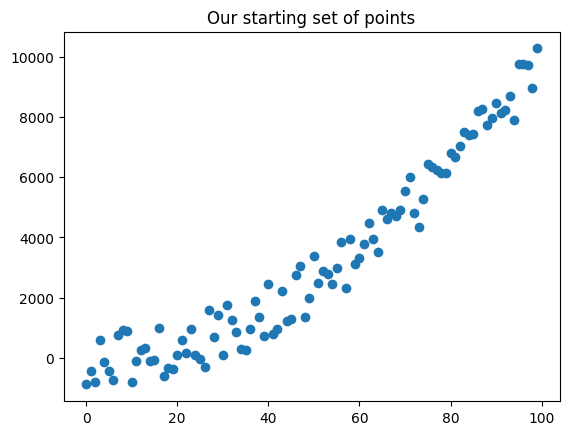

In [141]:
random.seed(123)

xs = list(range(100))
ys = [x**2 + random.randint(-1000, 1000) for x in xs]

# Plot it
plt.title('Our starting set of points')
plt.scatter(xs, ys);

In [142]:
# Create a function that calculates the error of a line in the form y = a*x + b
def err(a, b, x, y):
    return (y - (a * x + b))**2

def sumsq(a, b, xs, ys):
    return sum([err(a,b,x,y) for x,y in zip(xs,ys)])

In [143]:
# Let's guess at a line
a = 30 # the slope
b = 0 # the y-intercept
error = sumsq(a,b,xs,ys)
f"{error:,}"

'865,516,539'

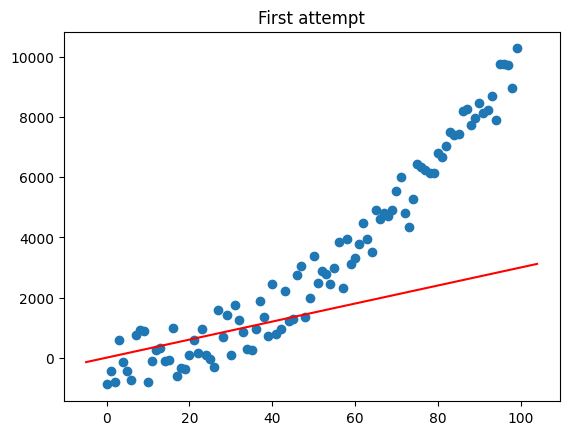

In [144]:
# Plotted with the line
plt.title('First attempt')
plt.scatter(xs, ys)

# Plot a red line: y=ax+b
axes = plt.gca()
xx = np.array(axes.get_xlim())
yy = a * xx + b
plt.plot(xx, yy, '-', color='r');

In [145]:
# We can try different a and b value to see if we can lower that value.
a = 100 # the slope
b = -200 # the y-intercept
error = sumsq(a,b,xs,ys)
f"{error:,}"

'309,029,919'

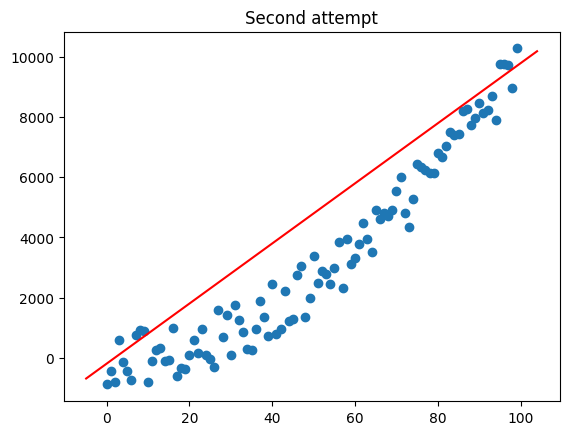

In [146]:
# Well, this is actually a litte better
plt.title('Second attempt')
plt.scatter(xs, ys)

# Plot a red line: y=ax+b
axes = plt.gca()
xx = np.array(axes.get_xlim())
yy = a * xx + b
plt.plot(xx, yy, '-', color='r');

In [147]:
# How do we find the "best" line? Guess forever? No!

# We create a function that only accepts a two dimensional list, called x, where x[0] = a and x[1] = b.
def err1(x):
    return sumsq(x[0], x[1], xs, ys)

# Then we define an initial guess
initialGuess = [0.0, 0.0]

# And we call this cool function:
result = sci.optimize.minimize(err1, initialGuess, method='CG') # CG = conjugate gradient algorithm

# This creates a result object that contains optimized values.
print(result)
a,b = result.x


print(f"""
The important values are:
  a = {a}
  b = {b}
  sumsq = {result.fun:,}
""")


     fun: 88445841.12164561
     jac: array([1., 1.])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 172
     nit: 11
    njev: 54
  status: 2
 success: False
       x: array([  104.18351233, -1887.37633976])

The important values are:
  a = 104.18351232567838
  b = -1887.3763397579266
  sumsq = 88,445,841.12164561



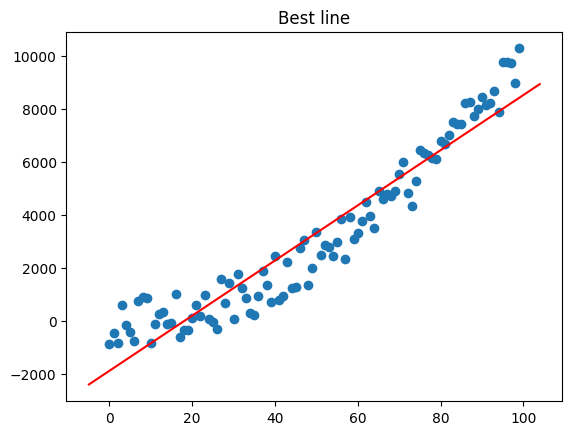

In [148]:
# Now let's plot the "best" line: y = ax+b
plt.title('Best line')
plt.scatter(xs, ys)

# Plot a red line: y=ax+b
axes = plt.gca()
xx = np.array(axes.get_xlim())
yy = a * xx + b
plt.plot(xx, yy, '-', color='r');

And that is the only line that best "fits" the set of points.